In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load and clean data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult3.csv")

In [ ]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
data.replace({'workclass': {'?': 'Others'}}, inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
data.replace({'occupation': {'?': 'Others'}}, inplace=True)
print(data['occupation'].value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

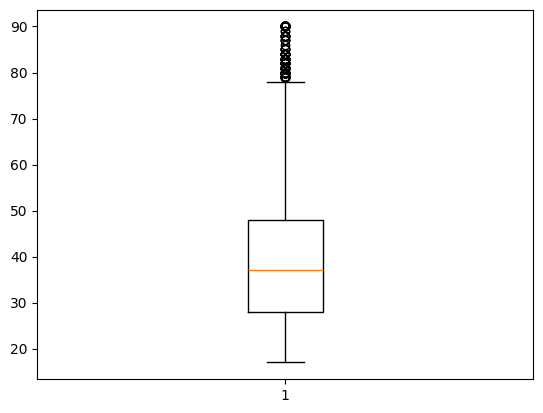

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]
data=data.drop(columns=['education']) #redundant features removal

In [ ]:
data.shape


(46720, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [ ]:
#data = data.dropna(subset=['income'])
print(data.shape)
print(data.head())

(46720, 14)
   age  workclass  fnlwgt  educational-num  marital-status  occupation  \
0   25          3  226802                7               4           6   
1   38          3   89814                9               2           4   
2   28          1  336951               12               2          11   
3   44          3  160323               10               2           6   
4   18          2  103497               10               4           8   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0             3     2       1             0             0              40   
1             0     4       1             0             0              50   
2             0     4       1             0             0              40   
3             0     2       1          7688             0              40   
4             3     4       0             0             0              30   

   native-country income  
0              39  <=50K  
1              39  <=50K  

In [ ]:
# Create derived features BEFORE train_test_split
data['education_work_ratio'] = data['educational-num'] / (data['hours-per-week'] + 1)
data['experience'] = data['age'] - data['educational-num']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
# Label encode categorical columns manually first
encoder = LabelEncoder()

categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'gender', 'native-country']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Define features and target
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})
x = data.drop(columns=['income'])
y = data['income']

numerical_cols = ['age', 'educational-num', 'hours-per-week', 'education_work_ratio', 'experience']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create scaler for numeric columns only
scaler = StandardScaler()

# Fit scaler on train numeric columns and transform
X_train_num_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

# Replace numeric columns in train and test sets with scaled values
import numpy as np

X_train_scaled = X_train.copy().astype(float)
X_train_scaled[numerical_cols] = X_train_num_scaled

X_test_scaled = X_test.copy().astype(float)
X_test_scaled[numerical_cols] = X_test_num_scaled


from sklearn.svm import LinearSVC

models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LinearSVM": LinearSVC(max_iter=2000)
}

results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")



🔄 Training LogisticRegression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.8131
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7010
           1       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.76      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344


🔄 Training RandomForest...
RandomForest Accuracy: 0.8467
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7010
           1       0.73      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.80      0.77      0.78      9344
weighted avg       0.84      0.85      0.84      9344


🔄 Training KNN...
KNN Accuracy: 0.7672
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      7010
           1       0.56      0.32      0.41      2334

    accuracy                           0.77     

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Load trained model pipeline
model = joblib.load("best_model.pkl")

# Streamlit page configuration
st.set_page_config(page_title="💰 Income Predictor with SHAP", layout="wide")

# Custom styles
st.markdown("""
    <style>
    .main {
        background-color: #f9f9f9;
        padding: 2rem;
        border-radius: 10px;
        font-family: 'Segoe UI', sans-serif;
    }
    .stButton>button {
        background-color: #0072C6;
        color: white;
        font-weight: bold;
        border-radius: 10px;
        padding: 0.5rem 1.5rem;
        transition: all 0.3s ease-in-out;
    }
    .stButton>button:hover {
        background-color: #005999;
    }
    </style>
""", unsafe_allow_html=True)

# App title
st.title("💼 Income Prediction with SHAP Explainability")

# Sidebar Inputs
st.sidebar.header("📋 User Information")

age = st.sidebar.slider("Age", 18, 70, 30)
workclass = st.sidebar.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Self-emp-inc',
                                               'Federal-gov', 'Local-gov', 'State-gov',
                                               'Without-pay', 'Never-worked', 'Others'])
marital_status = st.sidebar.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse',
                                                         'Divorced', 'Separated', 'Married-spouse-absent', 'Widowed'])
occupation = st.sidebar.selectbox("Occupation", [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales',
    'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners',
    'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing',
    'Transport-moving', 'Priv-house-serv', 'Protective-serv',
    'Armed-Forces', 'Others'])
relationship = st.sidebar.selectbox("Relationship", ['Husband', 'Wife', 'Own-child', 'Not-in-family', 'Unmarried', 'Other-relative'])
race = st.sidebar.selectbox("Race", ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
gender = st.sidebar.radio("Gender", ['Male', 'Female'])
native_country = st.sidebar.selectbox("Native Country", ['United-States', 'India', 'Mexico', 'Philippines', 'Germany', 'Others'])

educational_num = st.slider("📚 Educational Number", 1, 16, 10)
hours_per_week = st.slider("⏱️ Work Hours per Week", 1, 80, 40)

# Derived features
education_work_ratio = round(educational_num / (hours_per_week + 1), 2)
experience = max(age - educational_num, 0)

# Input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'native-country': [native_country],
    'educational-num': [educational_num],
    'hours-per-week': [hours_per_week],
    'education_work_ratio': [education_work_ratio],
    'experience': [experience]
})

# Display input
st.markdown("### 🔍 Review Input")
st.dataframe(input_df)

# Predict and Explain
if st.button("📊 Predict and Explain"):
    try:
        # Prediction
        prediction = model.predict(input_df)[0]
        prob = model.predict_proba(input_df)[0][1] if hasattr(model, "predict_proba") else None

        st.subheader("📈 Prediction Result")
        st.success(f"Predicted Income: {'>50K' if prediction == 1 else '<=50K'}")
        if prob is not None:
            st.info(f"Model Confidence: **{prob:.2%}**")

        # SHAP Explainability
        st.subheader("🧠 SHAP Explanation")
        with st.spinner("Calculating SHAP values..."):
            explainer = shap.Explainer(model.predict, input_df)
            shap_values = explainer(input_df)

            fig, ax = plt.subplots(figsize=(10, 5))
            shap.plots.waterfall(shap_values[0], max_display=10, show=False)
            st.pyplot(fig)

    except Exception as e:
        st.error(f"⚠️ Prediction or SHAP failed: {e}")


Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
pip install streamlit

In [ ]:
!ngrok authtoken 307qdSnSdNZXmcWAIYME1jPgghe_5WKTdvxGprTw7DEBH9b6G

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py  --server.port 8501")

thread=threading.Thread(target=run_streamlit)
thread.start()

In [ ]:
from pyngrok import ngrok
import time

time.sleep(5)
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

# Launch Streamlit in background
!streamlit run app.py &>/dev/null &


Streamlit URL: NgrokTunnel: "https://168d2ba5b772.ngrok-free.app" -> "http://localhost:8501"
